In [58]:
import pandas.io.data as web
import pandas as pd
import quandl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
dow_code = 'BCB/UDJIAD1'
DJI = quandl.get(dow_code)

In [10]:
DJC_data = {}

DJComp = ['MSFT', 'PFE', 'MCD', 'UTX', 'DD', 'MMM', 'MRK', 'KO', 'WMT', 'HD', 'AAPL', 'CSCO', 'IBM', 'VZ', 'JNJ', 'GE', 'XOM', 'CVX', 'DIS', 'UNH', 'JPM', 'NKE', 'BA', 'CAT', 'TRV', 'GS', 'PG', 'V', 'AXP', 'INTC']

for ticket in DJComp:
    DJC_data[ticket] =web.get_data_yahoo(ticket)

DJIA_data = web.DataReader('DJIA','fred')

In [90]:
len(DJComp)

30

In [81]:
DJC_data

{'AAPL':                   Open        High         Low       Close     Volume  \
 Date                                                                    
 2010-01-04  213.429998  214.499996  212.380001  214.009998  123432400   
 2010-01-05  214.599998  215.589994  213.249994  214.379993  150476200   
 2010-01-06  214.379993  215.230000  210.750004  210.969995  138040000   
 2010-01-07  211.750000  212.000006  209.050005  210.580000  119282800   
 2010-01-08  210.299994  212.000006  209.060005  211.980005  111902700   
 2010-01-11  212.799997  213.000002  208.450005  210.110003  115557400   
 2010-01-12  209.189995  209.769995  206.419998  207.720001  148614900   
 2010-01-13  207.870005  210.929995  204.099998  210.650002  151473000   
 2010-01-14  210.110003  210.459997  209.020004  209.430000  108223500   
 2010-01-15  210.929995  211.599997  205.869999  205.930000  148516900   
 2010-01-19  208.330002  215.189999  207.240004  215.039995  182501900   
 2010-01-20  214.910006  215.5

In [12]:
price = pd.DataFrame({tic:data['Adj Close'] for tic, data in DJC_data.iteritems()})

(1714,)

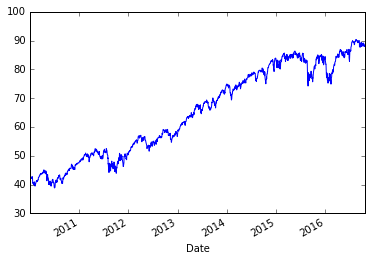

In [93]:
calculated = price.T.sum()/30
calculated.plot()
calculated.shape
# sm = []
# computed = pd.DataFrame(price.sum())

(1714, 1)

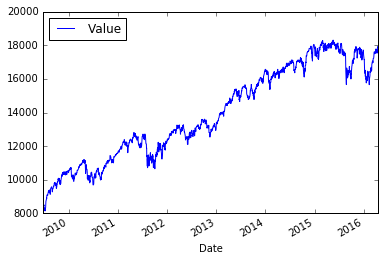

In [91]:
real = DJI.tail(1714)
real.plot()
real.shape

In [88]:
real.Value.corr(calculated)

0.99737367886522954